In [12]:
## 引入头文件
import cv2
import numpy as np
from skimage import filters, feature, img_as_float
import os
import matplotlib.pyplot as plt
from skimage.feature import shape_index
from skimage.draw import circle
from skimage.filters import try_all_threshold
from skimage.segmentation import chan_vese
from skimage.filters import threshold_otsu

In [13]:
## 定义路径
# 将path定义为图片文件夹的路径
path = r'C:\Users\Kfor\Desktop\亚太\2019 APMCM Problems\2019 APMCM Problems\A_source'
os.chdir(path)

In [14]:
#自动检测坩埚位置的参数，级边框位置
lineWidth = 5
# upInner = 150
upInner = 68
# downInner = 1050
downInner = 1075
leftInner = 504
rightInner = 1608

In [15]:
# 自动标记边框的四条线的参数，并导出图像的函数 
def checkAndDrawBorder(filename,imageTest,leftInner,upInner,rightInner,downInner):
    i = 0
    maxStep = 200
    leftThreshold = 100
    upThreshold = 220
    rightThreshold = 212
    downThreshold = 160
    while((imageTest[500:580,leftInner-lineWidth:leftInner] < leftThreshold).any()) :
        leftInner -= 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[500:580,leftInner+1] < leftThreshold).any() == False) :
        leftInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[upInner-lineWidth:upInner,966:1150] <upThreshold).any()) :
        upInner -= 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[upInner + 1,966:1150] < upThreshold).any() == False) :
        upInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[500:640,rightInner:rightInner + lineWidth] < rightThreshold).any()) :
        rightInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[500:640,rightInner - 1] < rightThreshold).any() == False) :
        rightInner -= 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[downInner:downInner + lineWidth,966:1150] < downThreshold).any()) :
        downInner += 1
        i += 1
        if(i>maxStep):
            break
    i = 0
    while((imageTest[downInner-1, 966:1150] < downThreshold).any() == False) :
        downInner -= 1
        i += 1
        if(i>maxStep):
            break
    imageTest[upInner-lineWidth:upInner,:] = 0
    imageTest[downInner:downInner+lineWidth,:] = 0
    imageTest[:,leftInner-lineWidth:leftInner] = 0
    imageTest[:,rightInner:rightInner+lineWidth] = 0
    # 在上级目录建立新的文件夹用于存储消抖动图片
    image = imageTest[upInner:downInner,leftInner:rightInner]
    cv2.imwrite("../Antij_source/"+filename,imageTest)
    cv2.imwrite("../Antij_source_result/"+filename,image)
    
    return [leftInner,upInner,rightInner,downInner]

In [16]:
## 通过上述区域选择来消除抖动，并得到消抖之后的图片

# 建立储存带框的坩埚图的文件夹
try:
    os.makedirs('../Antij_source')
    os.makedirs('../Antij_source_result')
except:
    pass
source_list = os.listdir()
#antij_dic = {} # 有抖动的bmp字典，对应偏移的y，x值
# print(source_list)

for oneImage in source_list:
    # 读入
    imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
    imageTest = cv2.equalizeHist(imageTest)
    
    checkAndDrawBorder(oneImage,imageTest,leftInner,upInner,rightInner,downInner)
    

In [17]:
# ## 提取坩埚中间的圆的方形区域

# # 读入
# imageTest = cv2.imread('0497.bmp',cv2.IMREAD_GRAYSCALE)
# imageTest = cv2.equalizeHist(imageTest)

# # 定义用来标记边框的四条线的参数
# lineWidth = 5
# upInner = 150
# downInner = 1050
# leftInner = 510
# rightInner = 1545

# imageTest[upInner-lineWidth:upInner,:] = 0
# imageTest[downInner:downInner+lineWidth,:] = 0
# imageTest[:,leftInner-lineWidth:leftInner] = 0
# imageTest[:,rightInner:rightInner+lineWidth] = 0

# plt.imshow(imageTest,cmap=plt.cm.gray)

# # 定义出方便调用的函数，得到圆的区域
# def getCircleArea(imageTest,shiftY=0,shiftX=0):
#     lineWidth = 5
#     upInner = 150 + shiftY
#     downInner = 1050 + shiftY
#     leftInner = 510 + shiftX
#     rightInner = 1545 + shiftX
#     image = imageTest[upInner:downInner,leftInner:rightInner]
#     return image


In [18]:
# ## 用于计算抖动字典（下方）


# # # 读入
# # oneImage = '0497.bmp'
# # imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
# # imageTest = cv2.equalizeHist(imageTest)
# # # 调整偏移
# # shiftX = 0
# # shiftY = 0
# # image = getCircleArea(imageTest,shiftY,shiftX)
# antij_dic[oneImage] = [shiftY,shiftX] # 注意是先纵轴后横轴

In [19]:
# ## 通过上述区域选择来消除抖动，并得到消抖之后的图片，存储

# source_list = os.listdir()
# antij_dic = {} # 有抖动的bmp字典，对应偏移的y，x值

# # TODO: 记得手动看看抖动情况

# for oneImage in source_list:
#     # 读入
#     imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
#     imageTest = cv2.equalizeHist(imageTest)

#     if oneImage in antij_dic:
#         image = getCircleArea(imageTest,*antij_dic[oneImage])
#     else:
#         image = getCircleArea(imageTest)
    
#     # 在上级目录建立新的文件夹用于存储消抖动图片
#     try:
#         os.makedirs('../Antij_source')
#     except:
#         pass

#     cv2.imwrite('../Antij_source/'+oneImage, image)

In [20]:
# ## 裁剪至小框

# os.chdir('../Antij_source')

# imageTest = cv2.imread('0497.bmp',cv2.IMREAD_GRAYSCALE)

# # 定义用来标记边框的四条线的参数
# lineWidth = 5
# upInner = 200
# downInner = 700
# leftInner = 100
# rightInner = 600

# imageTest[upInner-lineWidth:upInner,:] = 0
# imageTest[downInner:downInner+lineWidth,:] = 0
# imageTest[:,leftInner-lineWidth:leftInner] = 0
# imageTest[:,rightInner:rightInner+lineWidth] = 0

# plt.imshow(imageTest,cmap=plt.cm.gray)

# def getInner(imageTest):
#     upInner = 200
#     downInner = 700
#     leftInner = 100
#     rightInner = 600
#     image = imageTest[upInner:downInner,leftInner:rightInner]
#     return image


# for oneImage in os.listdir():
#     # 读入
#     imageTest = cv2.imread(oneImage,cv2.IMREAD_GRAYSCALE)
#     imageTest = cv2.equalizeHist(imageTest)
#     # 覆盖写回
#     image = getInner(imageTest)

#     try:
#         os.makedirs('../InnerArea')
#     except:
#         pass

#     cv2.imwrite('../InnerArea/'+oneImage, image)
    

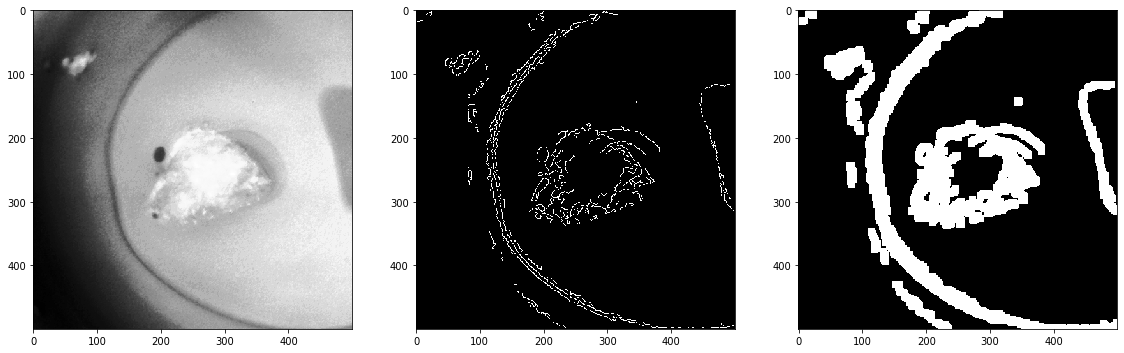

In [21]:
## 用于验证边缘检测算法

os.chdir('../InnerArea')

# 读取图像（测试）
imageTest = cv2.imread("0511.bmp", cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(40,100))
# 直方图均值化
plt.subplot(1,6,1)
plt.imshow(imageTest,cmap=plt.cm.gray)


kernel = np.ones((3,3),np.uint8)

# canny边缘检测
ed1 = feature.canny(imageTest,sigma=1)
tmp = np.ndarray(shape=np.shape(ed1))
tmp[ed1] = 255
tmp = cv2.dilate(tmp, kernel, iterations=5)

# ed2 = feature.canny(imageTest,sigma=1.75)
# ed2 = cv2.dilate(ed2, kernel, iterations=2)
# ed3 = feature.canny(imageTest,sigma=2)
# ed3 = cv2.dilate(ed3, kernel, iterations=2)
# ed4 = feature.canny(imageTest,sigma=2.25)
# ed4 = cv2.dilate(ed4, kernel, iterations=2)
# ed5 = feature.canny(imageTest,sigma=2.5)
# ed5 = cv2.dilate(ed5, kernel, iterations=2)

plt.subplot(1,6,2)
plt.imshow(ed1,cmap=plt.cm.gray)

plt.subplot(1,6,3)
plt.imshow(tmp,cmap=plt.cm.gray)
# plt.subplot(1,6,3)
# plt.imshow(ed2,cmap=plt.cm.gray)

# plt.subplot(1,6,4)
# plt.imshow(ed3,cmap=plt.cm.gray)

# plt.subplot(1,6,5)
# plt.imshow(ed4,cmap=plt.cm.gray)

# plt.subplot(1,6,6)
# plt.imshow(ed5,cmap=plt.cm.gray)

# 至此得出，sigma选择2.25效果较好

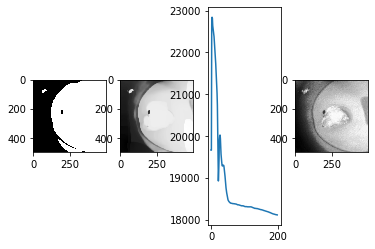

In [22]:
imageTest = img_as_float(imageTest)

# tmp = np.ndarray(shape=np.shape(imageTest))
# tmp[imageTest] = 255

cv = chan_vese(imageTest, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)
plt.subplot(1,4,1)
plt.imshow(cv[0],cmap=plt.cm.gray)
plt.subplot(1,4,2)
plt.imshow(cv[1],cmap=plt.cm.gray)
plt.subplot(1,4,3)
plt.plot(cv[2])
plt.subplot(1,4,4)
plt.imshow(imageTest,cmap=plt.cm.gray)

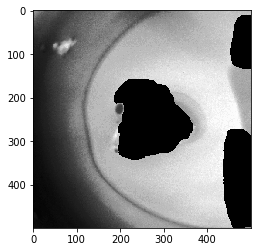

In [23]:
image = cv[1]
imageTest = cv2.imread("0511.bmp", cv2.IMREAD_GRAYSCALE)
im = image > 0.545
imageTest[im] = 0
plt.imshow(imageTest,cmap=plt.cm.gray)